# 実行環境

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# numpyのimportでsystem errorが出た時のワークアラウンド
# エラーが出たら実行
!pip install "numpy<1.24.0"

In [ ]:
!pip install cellphonedb
!pip install spektral
!pip install biomart
!pip install libpysal
!pip install esda
!pip install japanize-matplotlib
!sudo apt install tree

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Graduation_Research/mouse_brain_light_ver

/content/drive/MyDrive/Colab Notebooks/Graduation_Research/mouse_brain_light_ver


In [ ]:
!tree

# CellPhoneDB

In [ ]:
# CellPhoneDBへの入力データのフォーマットを整える (必要に応じて)
# 整えたファイルを "data/cellphonedb_input" に保存
!python src/cellphonedb/reshape_visium_data.py

In [ ]:
# CellPhoneDBを実行
# "data/cellphonedb_output" に出力
!cellphonedb method statistical_analysis data/cellphonedb_input/clusters_reshaped.txt data/cellphonedb_input/counts_reshaped.txt --output-path=data/cellphonedb_output

[ ][APP][14/02/23-05:21:14][WARNING] No local databases found. Will download latest database from remote to /root/.cpdb/releases.
[ ][APP][14/02/23-05:21:15][INFO] Downloading release v4.0.0 of CellPhoneDB database
[ ][APP][14/02/23-05:21:16][INFO] Download completed!
[ ][APP][14/02/23-05:21:16][INFO] Copying database to /root/.cpdb/releases/v4.0.0
[ ][CORE][14/02/23-05:21:16][INFO] Initializing SqlAlchemy CellPhoneDB Core
[ ][CORE][14/02/23-05:21:16][INFO] Using custom database at /root/.cpdb/releases/v4.0.0/cellphone.db
[ ][APP][14/02/23-05:21:16][INFO] Launching Method cpdb_statistical_analysis_local_method_launcher
[ ][APP][14/02/23-05:21:16][INFO] Launching Method _set_paths
[ ][APP][14/02/23-05:21:16][INFO] Launching Method _load_meta_counts
[ ][APP][14/02/23-05:21:23][INFO] Launching Method _check_counts_data
[ ][CORE][14/02/23-05:21:23][INFO] Launching Method cpdb_statistical_analysis_launcher
[ ][CORE][14/02/23-05:21:23][INFO] Launching Method _counts_validations
[ ][CORE][14/

# GCNG

In [ ]:
# 各評価用データセットの正例を決定 (pvalueでのインデックスの形で保存)
# "data/gcng_input/interaction_list/" に保存
!python src/GCNG/generate_intearaction_list.py

delete same pair in pvalue (from  857  to  845 )
dataset 1 >> positive_num :  845
dataset 2 >> positive_num :  362
dataset 3 >> positive_num :  203


In [ ]:
# 隣接行列を4パターン作成
# "data/gcng_input/adj_matrix/" に保存
!python src/GCNG/generate_adj_matrix.py

2023-02-24 02:34:35.326440: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-24 02:34:37.097671: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-24 02:34:37.097869: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-24 02:34:37.097896: W tensorfl

In [ ]:
# 発現行列を4パターン作成
# "data/gcng_input/exp_matrix/" に保存
!python src/GCNG/generate_exp_matrix.py

[dataset 1(0~845)]
  <1> train: 1128 , test: 562  (0~281)
  <2> train: 1126 , test: 564  (281~563)
  <3> train: 1126 , test: 564  (563~845)
[dataset 2a(0~362)]
  <1> train: 484 , test: 240  (0~120)
  <2> train: 482 , test: 242  (120~241)
  <3> train: 482 , test: 242  (241~362)
[dataset 2b]
  <1> train:  256 , test:  468
  <2> train:  468 , test:  256
[dataset 3(0~203)]
  <1> train: 272 , test: 134  (0~67)
  <2> train: 270 , test: 136  (67~135)
  <3> train: 270 , test: 136  (135~203)


In [ ]:
# 作成した発現行列の遺伝子ペアの関係性をベン図で表し確認
!python src/GCNG/check_matrix.py

dataset1  : 845
dataset2a : 362
dataset2b : 362
dataset3  : 203
~ 作成したベン図をチェック ~ 


隣接行列のパターン
  
    1 : スポットごと

    2 : 一つ隣と繋ぐ

    3 : 二つ先まで繋ぐ

    4 : クラスタごとに繋ぐ

発現行列のパターン

    1 : データベース内のすべての組み合わせ

    2a : P値が閾値以下の組み合わせ (正例をランダムに分割)

    2b : P値が閾値以下の組み合わせ (正例を連結成分ごとに分割)

    3 : 閾値以下が一定数以上ある組み合わせ

 引数

一つ目 : 隣接行列のパターン

二つ目 : 発現行列のパターン

三つ目 : クロスバリデーションの何個目か

四つめ : 正規化の種類

In [ ]:
!python src/GCNG/gcng.py "4" "3" 1 "endocrine"
!python src/GCNG/gcng.py "4" "3" 2 "endocrine"
!python src/GCNG/gcng.py "4" "3" 3 "endocrine"

# 従来手法 (SVM, RandomForest)

In [ ]:
!python src/Conventional_methods/Conventional_methods.py

2023-03-17 04:07:08.583051: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 04:07:10.747987: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-17 04:07:10.748259: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-17 04:07:10.748295: W tensorfl

# 結果をまとめる

In [ ]:
# 変数normalized_methodを任意に指定
!python src/summarize/exp1-1.py

In [ ]:
# 変数normalized_methodを任意に指定
!python src/summarize/exp1-2.py

In [ ]:
# 変数normalized_methodを任意に指定
!python src/summarize/exp2.py

# 考察

In [ ]:
# ヒートマップをまとめて，クラスタリングし，プロット
# 変数normalized_methodとexp_patternを任意に指定
# "result/consideration/heatmap/..."に出力
!python src/summarize/consideration1.py

In [ ]:
# 各予測パターンでの遺伝子ペアの発現をプロット
# 変数normalized_methodとexp_patternを任意に指定
# "result/consideration/expression_image/"に出力
!python src/summarize/consideration2.py

In [ ]:
# 各予測パターンにおける各遺伝子ペアについて相関係数・モラン・発現総量を計算・保存
# 変数normalized_methodとexp_patternを任意に指定
# "result/consideration/feature/"に保存
!python src/summarize/consideration3.py

/usr/local/lib/python3.9/dist-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


In [ ]:
!python src/summarize/consideration4.py

Figure(640x480)
Figure(640x480)
Figure(640x480)
Figure(640x480)
Figure(640x480)


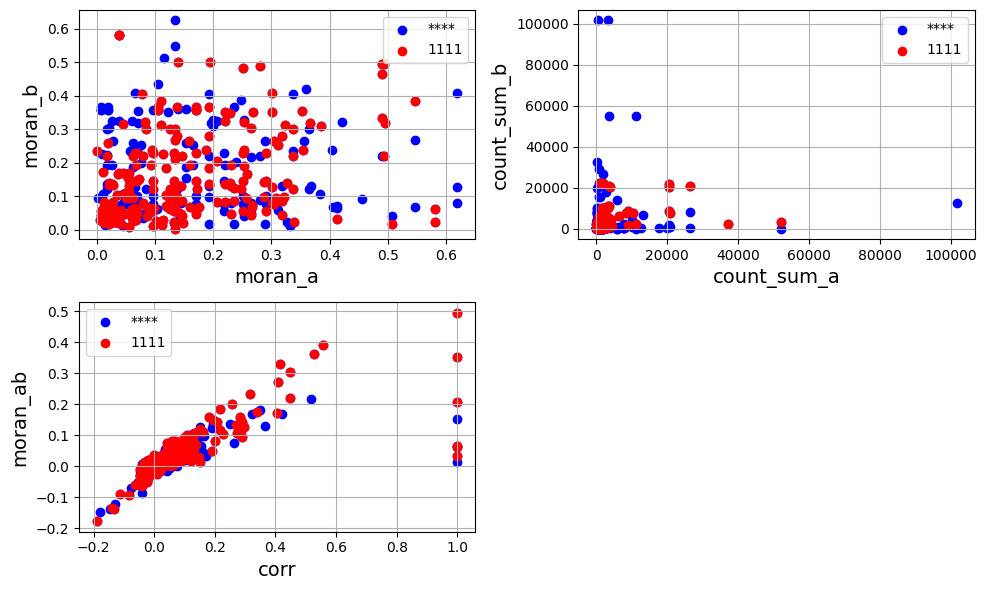

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import os

pattern_list = ["****","1111"] # ["****", "0000", "1000"]

normalized_method = "Laplacian"
#normalized_method = "endocrine"

exp_pattern = "exp2a"
#exp_pattern = "exp2b"
#exp_pattern = "exp3"


fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
#ax4 = fig.add_subplot(2, 2, 4)
c = ["b","r", "y"]
temp = 0

"""
  散布図をプロット
"""
for pattern in pattern_list:
  corr,moran_a,moran_b,moran_ab,sum_a,sum_b = [],[],[],[],[],[]
  if pattern=="1***":
    for pattern2 in ["1000","1001","1010","1011","1100","1101","1110"]:
      df_feature = pd.read_table("result/consideration/feature/"+normalized_method+"_"+exp_pattern+"/"+pattern2+".csv",sep=',', index_col=0)
      corr.extend(df_feature["corr"].tolist())
      moran_a.extend(df_feature["moran_a"].tolist())
      moran_b.extend(df_feature["moran_b"].tolist())
      moran_ab.extend(df_feature["moran_ab"].tolist())
      sum_a.extend(df_feature["sum_a"].tolist())
      sum_b.extend(df_feature["sum_b"].tolist())
      #ax1.scatter(moran_a, moran_b, c=c[temp], label=pattern_list[temp])
      #ax2.scatter(sum_a, sum_b, c=c[temp], label=pattern_list[temp])
      #ax3.scatter(corr, moran_ab, c=c[temp], label=pattern_list[temp])

  elif pattern=="****":
    for pattern2 in ["1000","1001","1010","1011","1100","1101","1110","1111","0000","0001","0010","0011","0100","0101","0110","0111"]:
      df_feature = pd.read_table("result/consideration/feature/"+normalized_method+"_"+exp_pattern+"/"+pattern2+".csv",sep=',', index_col=0)
      corr.extend(df_feature["corr"].tolist())
      moran_a.extend(df_feature["moran_a"].tolist())
      moran_b.extend(df_feature["moran_b"].tolist())
      moran_ab.extend(df_feature["moran_ab"].tolist())
      sum_a.extend(df_feature["sum_a"].tolist())
      sum_b.extend(df_feature["sum_b"].tolist())
  
  else:
    df_feature = pd.read_table("result/consideration/feature/"+normalized_method+"_"+exp_pattern+"/"+pattern+".csv",sep=',', index_col=0)
    corr.extend(df_feature["corr"].tolist())
    moran_a.extend(df_feature["moran_a"].tolist())
    moran_b.extend(df_feature["moran_b"].tolist())
    moran_ab.extend(df_feature["moran_ab"].tolist())
    sum_a.extend(df_feature["sum_a"].tolist())
    sum_b.extend(df_feature["sum_b"].tolist())
    
  ax1.scatter(moran_a, moran_b, c=c[temp], label=pattern_list[temp])
  ax2.scatter(sum_a, sum_b, c=c[temp], label=pattern_list[temp])
  ax3.scatter(corr, moran_ab, c=c[temp], label=pattern_list[temp])

  temp = temp + 1



ax1.set_xlabel("moran_a",fontsize=14)
ax2.set_xlabel("count_sum_a",fontsize=14)
ax3.set_xlabel("corr",fontsize=14)
ax1.set_ylabel("moran_b",fontsize=14)
ax2.set_ylabel("count_sum_b",fontsize=14)
ax3.set_ylabel("moran_ab",fontsize=14)

ax1.grid(True)
ax1.legend(loc='best',fontsize=10)
ax2.grid(True)
ax2.legend(loc='best',fontsize=10)
ax3.grid(True)
ax3.legend(loc='best',fontsize=10)

plt.tight_layout()
plt.show()

if not os.path.isdir("result/consideration/plot/"):
  os.makedirs("result/consideration/plot/")
#fig.savefig("result/consideration/plot/"+pattern_list[0]+"-"+pattern_list[1]+".pdf")
fig.savefig("result/consideration/plot/"+pattern_list[0]+"-"+pattern_list[1]+"-"+pattern_list[2]+".pdf")
